In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
%matplotlib inline 

In [3]:
print(xr.__version__)
print(matplotlib.__version__)
print(np.__version__)

0.10.6
2.2.2
1.14.3


### 1D data

In [4]:
#generate random data
data=np.random.random((365))
data[200:250]=np.nan
data[100:120]=np.nan

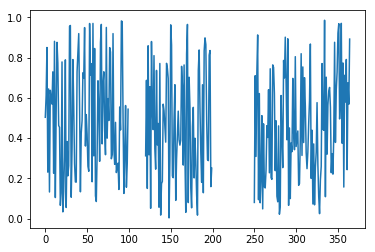

In [5]:
plt.plot(data) # nan gaps there

In [6]:
#creating a dummy 1d xarray dataset

In [7]:
times=pd.date_range('2001-01-01','2001-12-31',freq='1D') #fake daily times

In [8]:
xr_data=xr.Dataset({'random': (('time'), data)},{'time': times})
xr_data

<xarray.Dataset>
Dimensions:  (time: 365)
Coordinates:
  * time     (time) datetime64[ns] 2001-01-01 2001-01-02 2001-01-03 ...
Data variables:
    random   (time) float64 0.5034 0.6105 0.8502 0.2309 0.6441 0.132 0.6375 ...

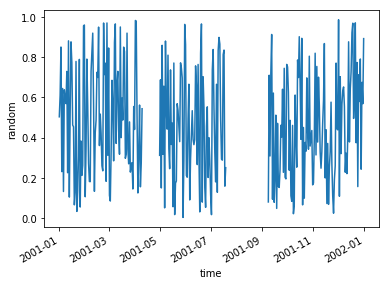

In [9]:
xr_data.random.plot.line() # works

### resampling to weekly data, resampling works?

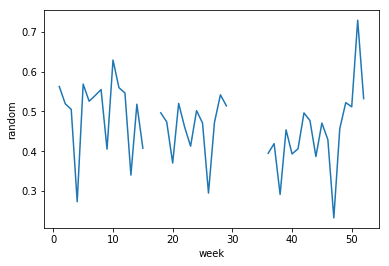

In [10]:
xr_data.groupby('time.week').apply(np.mean).random.plot.line() #could also use resample method

## 2d data

In [11]:
data=np.random.random((365,20))
data[200:250,:]=np.nan
data[100:120,:]=np.nan

In [12]:
xr_data=xr.Dataset({'random': (('time','lev'), data)},{'time': times,'lev':np.arange(1,21,1)})

In [13]:
xr_data

<xarray.Dataset>
Dimensions:  (lev: 20, time: 365)
Coordinates:
  * time     (time) datetime64[ns] 2001-01-01 2001-01-02 2001-01-03 ...
  * lev      (lev) int64 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
Data variables:
    random   (time, lev) float64 0.2291 0.1835 0.8512 0.9329 0.3802 0.7094 ...

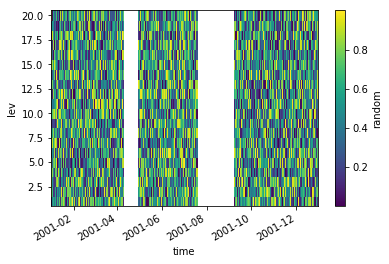

In [14]:
xr_data.random.T.plot.pcolormesh()

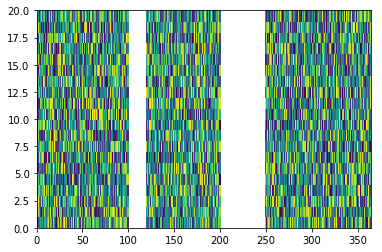

In [15]:
plt.pcolor(xr_data.random.T) #try directly with matplotlib

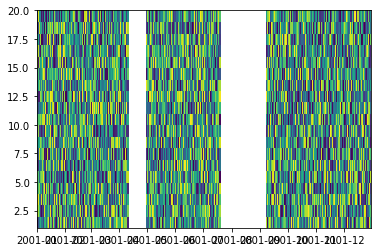

In [16]:
plt.pcolor(xr_data.time,xr_data.lev,xr_data.random.transpose())  #try passing coordinates explicitly 

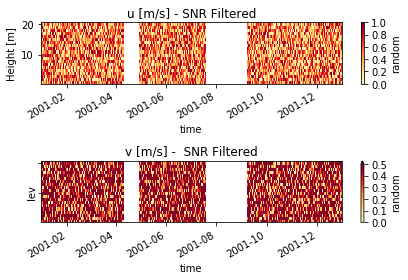

In [17]:
fig = plt.figure()
ax1 = plt.subplot(211)

cs = xr_data.random.transpose().plot.pcolormesh(cmap = 'YlOrRd', vmin = 0, vmax = 1.0)
cs.colorbar=True
plt.ylabel('Height [m]',fontsize=10)
plt.title('u [m/s] - SNR Filtered',fontsize=12)

ax2 = plt.subplot(212,sharey = ax1)
cs = xr_data.random.transpose().plot.pcolormesh(cmap = 'YlOrRd', vmin = 0, vmax = 0.5)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.title('v [m/s] -  SNR Filtered',fontsize=12)
plt.tight_layout()

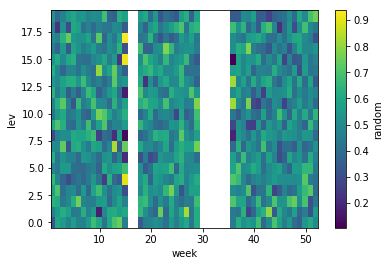

In [18]:
xr_data.groupby('time.week').apply(np.mean,axis=0).transpose().random.plot.pcolormesh() #could also use resample method

## chunks of data

In [19]:
data=np.random.random((365,20))
data[200:250,:]=np.nan
data[100:120,:]=np.nan

times1=pd.date_range('2001-01-01','2001-12-31',freq='1D') #fake daily times
xr_data1=xr.Dataset({'random': (('time','lev'), data)},{'time': times1,'lev':np.arange(1,21,1)})

times2=pd.date_range('2003-01-01','2003-12-31',freq='1D') #fake daily times
xr_data2=xr.Dataset({'random': (('time','lev'), data)},{'time': times2,'lev':np.arange(1,21,1)})


In [20]:
xr_data=xr.merge([xr_data1,xr_data2])

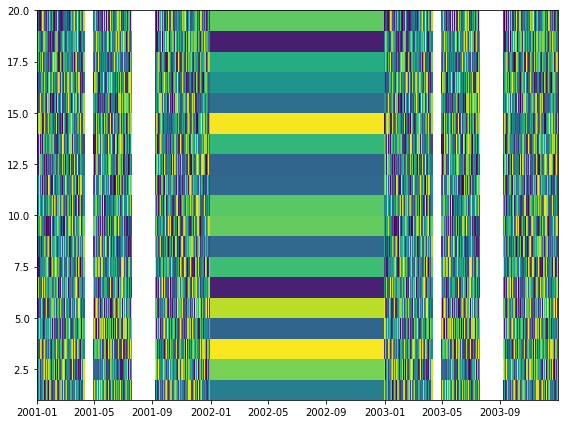

In [21]:
ax=plt.pcolormesh(xr_data.time,xr_data.lev,xr_data.random.transpose())
ax.figure.set_size_inches((8,6))
plt.tight_layout()

In [22]:
#This makes time as stings so nogaps but should be super slow 
#plt.pcolormesh(xr_data['time'].astype('str'),xr_data.lev,xr_data.random.transpose()) #

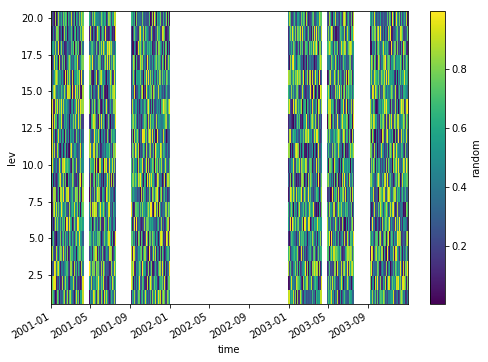

In [23]:
rs=xr_data.resample(time='23H')
ax=rs.asfreq().random.T.plot.pcolormesh()
ax.figure.set_size_inches((8,6))

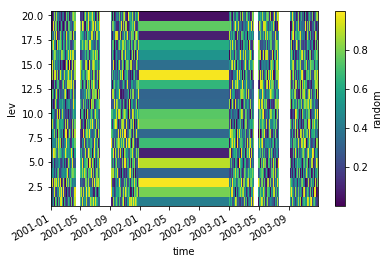

In [24]:
#this is default behaviour either forward fill backward fill or interpolate
rs.ffill().random.T.plot.pcolormesh() #forwad fill use .bfill() for backward fill
#rs.interpolate(kind='linear').random.T.plot.pcolormesh()

## resampled data can be reduced by a numpy function like np.min etc

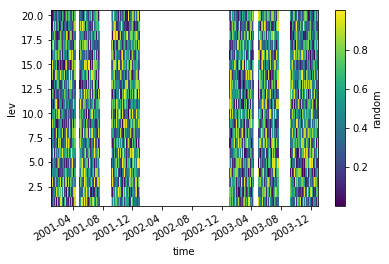

In [25]:
xr_data.resample(time='1D').mean(dim='time').random.transpose().plot.pcolormesh()
#xr_data.resample(time='1D').reduce(np.min,dim='time').random.transpose().plot.pcolormesh()